In [ ]:
# Let's create a nonlinear dataset using the make_moons() function
# Then, we'll build a pipeline that includes PolynomialFeatures (to map inputs to a higher-dimensional space),
# followed by feature scaling (StandardScaler), and a Linear SVM classifier (LinearSVC)

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

# Generate a 2D binary classification dataset with a crescent moon shape
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Assemble the pipeline:
# 1. Add polynomial features of degree 3
# 2. Standardize the features
# 3. Train a linear SVM with regularization parameter C=10 and hinge loss
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

# Train the model on the transformed nonlinear dataset
polynomial_svm_clf.fit(X, y)

/home/george/Machine Learning/C5 - Support Vector Machines/env/lib/python3.10/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/george/Machine Learning/C5 - Support Vector Machines/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

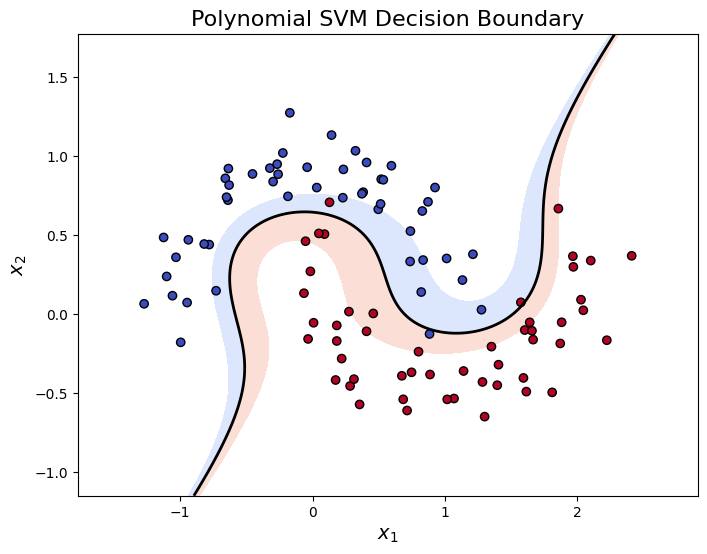

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the decision boundary of any classifier
def plot_decision_boundary(clf, X, y, ax=None, plot_title=""):
    if ax is None:
        ax = plt.gca()

    # Generate a grid of points covering the input feature space
    x0s = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200)
    x1s = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]

    # Compute the decision function values over the grid
    y_pred = clf.decision_function(X_new).reshape(x0.shape)

    # Plot filled contours for margins and background
    ax.contourf(x0, x1, y_pred, levels=[-1, 0, 1], alpha=0.3, cmap="coolwarm")
    
    # Plot the decision boundary (level=0 contour)
    ax.contour(x0, x1, y_pred, levels=[0], linewidths=2, colors='black')

    # Scatter plot of the actual dataset points, colored by class
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")

    # Label the axes and add a title
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title(plot_title, fontsize=16)

# Create the plot with decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(polynomial_svm_clf, X, y, plot_title="Polynomial SVM Decision Boundary with degree=3, c=5 and coef0=1")
plt.show()

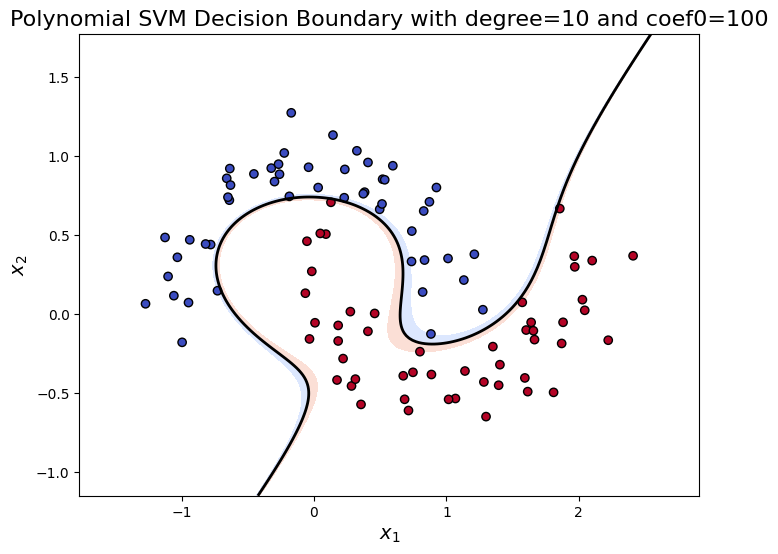

In [ ]:
# Let's now test the "kernel trick" using an SVM with a polynomial kernel
from sklearn.svm import SVC

# Create a pipeline that standardizes the data and applies SVM with a polynomial kernel
# - degree=10 makes the decision boundary very flexible (high-degree polynomial)
# - coef0=100 controls the influence of higher-degree versus lower-degree terms
# - C=5 is the regularization parameter, controlling margin size vs. misclassification
poly_kernel_svm_clf_degree10 = Pipeline([
    ("scaler", StandardScaler()),  # Feature scaling for better SVM performance
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))  # Polynomial kernel SVM
])

# Train the model on the nonlinear moon-shaped dataset
poly_kernel_svm_clf_degree10.fit(X, y)

# Plot the decision boundary of the trained polynomial SVM
plt.figure(figsize=(8, 6))
plot_decision_boundary(
    poly_kernel_svm_clf_degree10,
    X,
    y,
    plot_title="Polynomial SVM Decision Boundary with degree=10 c=5 and coef0=100"
)
plt.show()

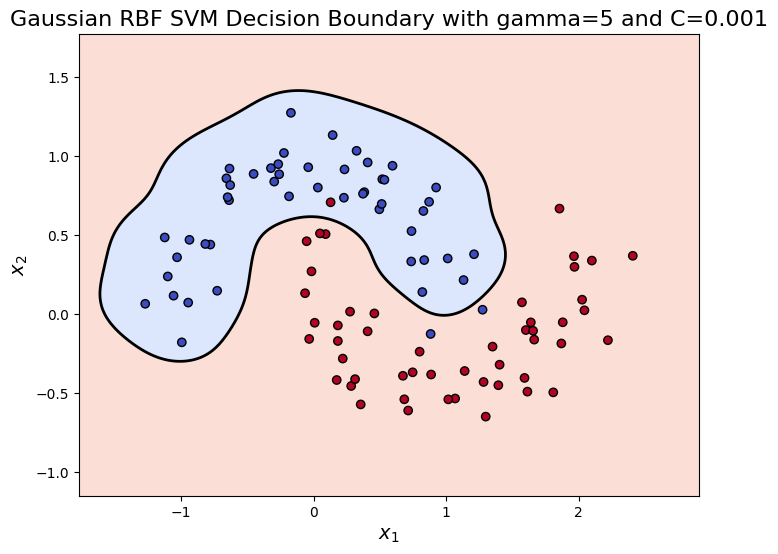

In [ ]:
# Let's try the same nonlinear dataset, this time using an SVM with a Gaussian RBF (Radial Basis Function) kernel
# The RBF kernel is a popular choice for nonlinear problems as it can model complex decision boundaries

# Assemble a pipeline with:
# - StandardScaler: scales features to zero mean and unit variance, essential for SVMs
# - SVC with RBF kernel:
#   - gamma=5: controls the width of the Gaussian kernel (higher values = tighter fit to training data)
#   - C=0.001: a very small regularization parameter, encouraging a larger margin even at the cost of some misclassifications
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

# Fit the model on the moon-shaped dataset
rbf_kernel_svm_clf.fit(X, y)

# Plot the resulting decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(
    rbf_kernel_svm_clf,
    X,
    y,
    plot_title="Gaussian RBF SVM Decision Boundary with gamma=5 and C=0.001"
)
plt.show()

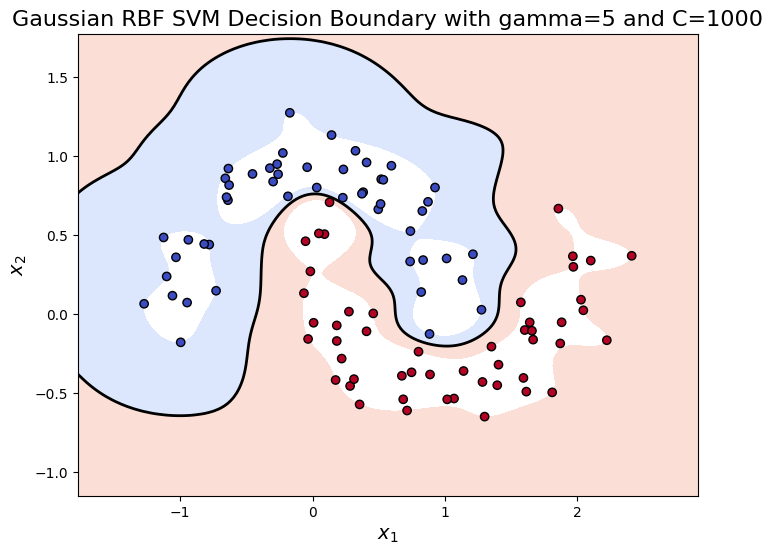

In [ ]:
# Pipeline assembled with gamma=5 and C=100
# We are still using the Gaussian RBF kernel to capture nonlinear patterns in the data
# This time:
# - gamma=5: still controls the influence of a single training example; a higher gamma makes the model more sensitive to individual points
# - C=100: high regularization strength, meaning the model will try to correctly classify every training instance
#   -> This usually leads to a tighter, more complex decision boundary (less regularization)

rbf_kernel_svm_clf_gamma5_C1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=100))
])

# Fit the SVM classifier to the nonlinear dataset
rbf_kernel_svm_clf_gamma5_C1000.fit(X, y)

# Plot the decision boundary learned by the model
plt.figure(figsize=(8, 6))
plot_decision_boundary(
    rbf_kernel_svm_clf_gamma5_C1000,
    X,
    y,
    plot_title="Gaussian RBF SVM Decision Boundary with gamma=5 and C=100"
)
plt.show()

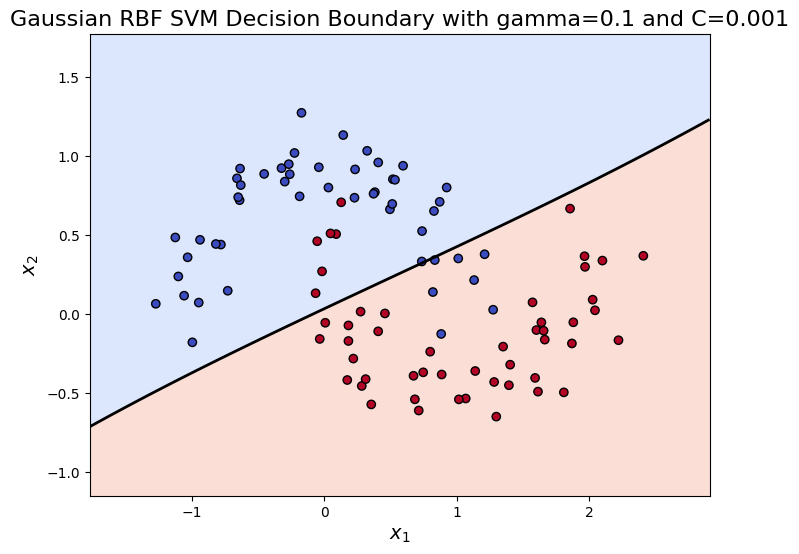

In [ ]:
# Pipeline assembled with gamma=0.1 and C=0.001
# This SVM uses the Gaussian RBF kernel with very **low model complexity**:
# - gamma=0.1: a low value means each point has a wide area of influence, making the model smoother and less sensitive to noise
# - C=0.001: strong regularization, allowing more margin violations (misclassified points) to prevent overfitting
#   -> The result is likely **underfitting**, as the model prioritizes simplicity over fitting the data well

rbf_kernel_svm_clf_gammap1_Cp001 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])

# Train the classifier on the dataset
rbf_kernel_svm_clf_gammap1_Cp001.fit(X, y)

# Visualize the decision boundary and dataset
plt.figure(figsize=(8, 6))
plot_decision_boundary(
    rbf_kernel_svm_clf_gammap1_Cp001,
    X,
    y,
    plot_title="Gaussian RBF SVM Decision Boundary with gamma=0.1 and C=0.001"
)
plt.show()

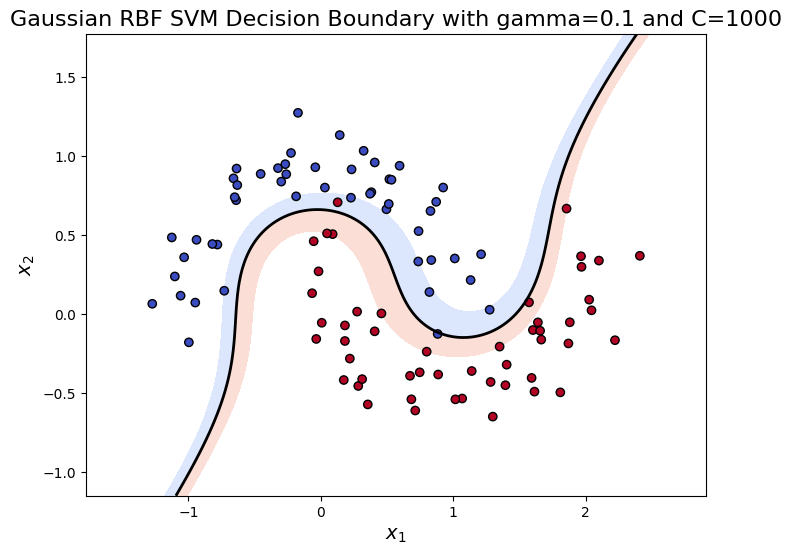

In [ ]:
# Pipeline assembled with gamma=0.1 and C=1000
# This configuration represents a **moderately flexible** model:
# - gamma=0.1: low gamma leads to broader influence for each training instance, so the decision boundary remains relatively smooth
# - C=1000: high regularization penalty -> the model will aim to minimize training errors, potentially at the cost of a more complex boundary
#   -> The combination of low gamma and high C encourages the model to find a **tight fit to the training data** with a **smooth curve**

rbf_kernel_svm_clf_gammap1_C1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])

# Train the model on the dataset
rbf_kernel_svm_clf_gammap1_C1000.fit(X, y)

# Plot the decision boundary and dataset
plt.figure(figsize=(8, 6))
plot_decision_boundary(
    rbf_kernel_svm_clf_gammap1_C1000,
    X,
    y,
    plot_title="Gaussian RBF SVM Decision Boundary with gamma=0.1 and C=1000"
)
plt.show()